In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load dataset

In [7]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'

In [8]:
#read the dataset

In [9]:
df = pd.read_csv(url)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [10]:
df.shape

(346, 10)

In [11]:
df.count

<bound method DataFrame.count of      Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0     PAIDOFF       1000     30       9/8/2016   
1             2             2     PAIDOFF       1000     30       9/8/2016   
2             3             3     PAIDOFF       1000     15       9/8/2016   
3             4             4     PAIDOFF       1000     30       9/9/2016   
4             6             6     PAIDOFF       1000     30       9/9/2016   
..          ...           ...         ...        ...    ...            ...   
341         394           394  COLLECTION        800     15      9/11/2016   
342         395           395  COLLECTION       1000     30      9/11/2016   
343         397           397  COLLECTION        800     15      9/12/2016   
344         398           398  COLLECTION       1000     30      9/12/2016   
345         399           399  COLLECTION       1000     30      9/12/2016   

       due_date  age          

In [12]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [13]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [14]:
#Data Cleaning

In [15]:
# Drop Insignificant Column
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [16]:
#Renaming Column
df.rename(columns={'Principal': 'principal', "Gender": "gender"}, inplace = True)
df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [12]:
# Standardizing Text & Fixing Typos
print(df['loan_status'].unique())
print(df['education'].unique())
print(df['gender'].unique())

['PAIDOFF' 'COLLECTION']
['High School or Below' 'Bechalor' 'college' 'Master or Above']
['male' 'female']


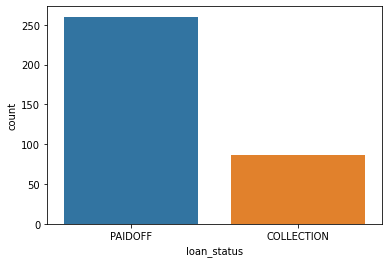

In [19]:
sns.countplot(df['loan_status'],label='count')

In [20]:
df['loan_status'] = df['loan_status'].apply(lambda x: 'paid_off' if (x == 'PAIDOFF')  else 'defaulted')

df.loc[df.education == 'High School or Below', 'education'] = 'high_school_or_below'
df.loc[df.education == 'college', 'education'] = 'college'
df.loc[df.education == 'Bechalor', 'education'] = 'bachelor'
df.loc[df.education == 'Master or Above', 'education'] = 'master_or_above'

df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paid_off,1000,30,9/8/2016,10/7/2016,45,high_school_or_below,male
1,paid_off,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,paid_off,1000,15,9/8/2016,9/22/2016,27,college,male
3,paid_off,1000,30,9/9/2016,10/8/2016,28,college,female
4,paid_off,1000,30,9/9/2016,10/8/2016,29,college,male


In [21]:
# Convert to date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paid_off,1000,30,2016-09-08,2016-10-07,45,high_school_or_below,male
1,paid_off,1000,30,2016-09-08,2016-10-07,33,bachelor,female
2,paid_off,1000,15,2016-09-08,2016-09-22,27,college,male
3,paid_off,1000,30,2016-09-09,2016-10-08,28,college,female
4,paid_off,1000,30,2016-09-09,2016-10-08,29,college,male


In [22]:
df['dayofweek_getloan'] = df['effective_date'].dt.dayofweek
df['dayofweek_dueloan'] = df['due_date'].dt.dayofweek
df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek_getloan,dayofweek_dueloan
0,paid_off,1000,30,2016-09-08,2016-10-07,45,high_school_or_below,male,3,4
1,paid_off,1000,30,2016-09-08,2016-10-07,33,bachelor,female,3,4
2,paid_off,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,paid_off,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,paid_off,1000,30,2016-09-09,2016-10-08,29,college,male,4,5


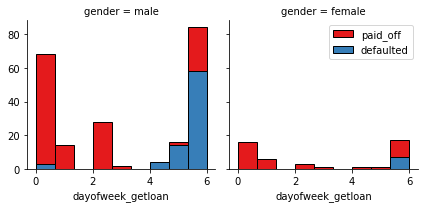

In [23]:
bins = np.linspace(df.dayofweek_getloan.min(), df.dayofweek_getloan.max(), 10)
g = sns.FacetGrid(df, col = "gender", hue="loan_status", palette="Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek_getloan', bins = bins, ec = "k")
g.axes[-1].legend()
plt.show()

In [24]:
#Data Preprocessing

In [25]:
#encode effective_date weekend
df['weekend_getloan'] = df['dayofweek_getloan'].apply(lambda x: 1 if (x > 3)  else 0)

#encode monday and sunday of due_date
df['startendweek_dueloan'] = df['dayofweek_dueloan'].apply(lambda x: 1 if (x == 0 or x == 6)  else 0)

#encode gender
gender_dummy = pd.get_dummies(df.gender)

#encode education
edu_dummy = pd.get_dummies(df.education)

#combined all new encoded features to dataframe
df = pd.concat([df, gender_dummy, edu_dummy], axis = 1)

#encode loan_status
df['loan_stat'] = df['loan_status'].apply(lambda x: 1 if (x == 'paid_off')  else 0)

#remove unused column.
df.drop(['loan_status','effective_date', 'due_date', 'dayofweek_getloan', 'dayofweek_dueloan', 'education','gender'], axis = 1, inplace = True)

df.head()

,principal,terms,age,weekend_getloan,startendweek_dueloan,female,male,bachelor,college,high_school_or_below,master_or_above,loan_stat
0,1000,30,45,0,0,0,1,0,0,1,0,1
1,1000,30,33,0,0,1,0,1,0,0,0,1
2,1000,15,27,0,0,0,1,0,1,0,0,1
3,1000,30,28,1,0,1,0,0,1,0,0,1
4,1000,30,29,1,0,0,1,0,1,0,0,1


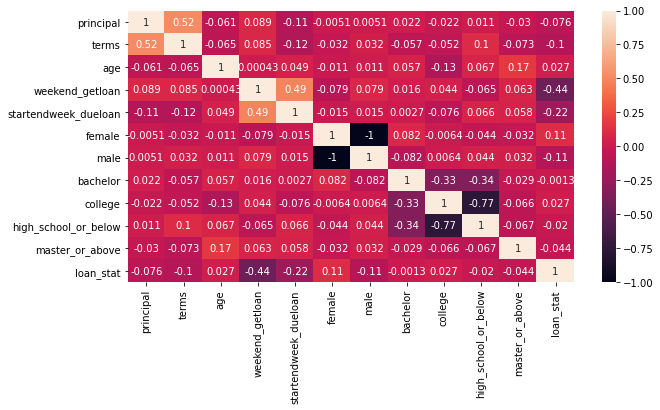

In [26]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [27]:
#Feature Selection

In [28]:
x = df.iloc[:,:-1].values
x

array([[1000,   30,   45, ...,    0,    1,    0],
       [1000,   30,   33, ...,    0,    0,    0],
       [1000,   15,   27, ...,    1,    0,    0],
       ...,
       [ 800,   15,   39, ...,    1,    0,    0],
       [1000,   30,   28, ...,    1,    0,    0],
       [1000,   30,   26, ...,    1,    0,    0]], dtype=int64)

In [29]:
y = df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
#Split Train and Test Set

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 11) (242,)
Test set: (104, 11) (104,)


In [32]:
#Data Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
#importing accuracy metrics

In [35]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [36]:
#Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression(solver = 'liblinear', random_state = 0)
regression.fit(x_train, y_train)

y_pred = regression.predict(x_test)

In [38]:
print(f1_score(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.8876404494382022
6.642203087062759


In [39]:
#Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [41]:
print(f1_score(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.7820512820512819
11.291623001861113


In [42]:
#Support Vector Machine

In [43]:
from sklearn.svm import SVC
vector=SVC(kernel='linear')
vector.fit(x_train,y_train)
y_pred=vector.predict(x_test)

In [44]:
print(f1_score(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.8817204301075269
7.30644876761057
